# Project studies the occurance of accidents in Canada. 
The aim is to identify the common cause of accidents and identify at risk drivers and also identify possible locations with higher accident numbers. These location can then be mapped by the city or responsible authority to reduce the number of fatal accidents.
Insurance companies can also prepare appropriately

The data used can be found in [Canada Open Data](https://open.canada.ca/data/en/dataset/1eb9eba7-71d1-4b30-9fb1-30cbdab7e63a). The followings are covered in this notebook

   - Steps to getting the data
   - Display some features of raw data
   - Prepare or clean the information
   - Visualize fatal and non-fatal accidents
   - Check seasonality effect

### Some useful packages

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import datetime
#used to get data directly from the URL
import urllib.request

# Ignore deprecated warning
import warnings
warnings.filterwarnings("ignore")

Changing the size of the default parameter sizes

In [3]:
%matplotlib inline
sns.set()
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          #'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
#plt.style.use('fivethirtyeight')


## 1. Getting the data
As mentioned, the data and the description can be found in [on this link](https://open.canada.ca/data/en/dataset/1eb9eba7-71d1-4b30-9fb1-30cbdab7e63a).

In [4]:
accidents_data_raw = pd.read_csv('/home/siro/Downloads/NCDB_1999_to_2016.csv',sep=',')

In [5]:
accidents_data_raw.head(2)

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,C_CASE
0,1999,1,1,20,2,02,34,UU,1,5,...,06,1990,01,M,41,11,1,UU,1,752
1,1999,1,1,20,2,02,34,UU,1,5,...,01,1987,01,M,19,11,1,UU,1,752


Get some features of the data

In [7]:
len(accidents_data_raw)

6486831

In [9]:
accidents_data_raw.dtypes

C_YEAR     int64
C_MNTH    object
C_WDAY    object
C_HOUR    object
C_SEV      int64
C_VEHS    object
C_CONF    object
C_RCFG    object
C_WTHR    object
C_RSUR    object
C_RALN    object
C_TRAF    object
V_ID      object
V_TYPE    object
V_YEAR    object
P_ID      object
P_SEX     object
P_AGE     object
P_PSN     object
P_ISEV    object
P_SAFE    object
P_USER    object
C_CASE     int64
dtype: object

Get a time series of non severe accidents in a year accidents per year

In [71]:
accident_per_year = df2[['C_YEAR', 'C_MNTH', 'C_WDAY', 'C_HOUR']][df2['C_SEV'].values.astype(int)==1]

In [73]:
accident_per_year = accident_per_year.rename(columns={'C_YEAR':'year', 'C_MNTH':'month', 'C_WDAY':'day', 'C_HOUR':'hour'})
accident_per_year.head()

,year,month,day,hour
50,1999,1,1,23
163,1999,1,1,12
164,1999,1,1,12
280,1999,1,1,15
281,1999,1,1,15


In [72]:
accident_per_year.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR
50,1999,1,1,23
163,1999,1,1,12
164,1999,1,1,12
280,1999,1,1,15
281,1999,1,1,15


In [46]:
letter_list = ['U', 'UU', 'UUU', 'UUUU', 'Q', 'QQ', 'QQQ', 'QQQQ', 
               'N', 'NN', 'NNN', 'NNNN', 'X', 'XX', 'XXX', 'XXXX']
acc_data = accidents_data_raw.replace(letter_list, np.nan)

Preparing the dates for analysis

In [47]:
acc_data = acc_data.rename(columns={'C_YEAR':'year', 'C_MNTH':'month', 'C_WDAY':'day', 'C_HOUR':'hour'})
acc_data.head()

,year,month,day,hour,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,C_CASE
0,1999,1,1,20,2,02,34,NaN,1,5,...,06,1990,01,M,41,11,1,NaN,1,752
1,1999,1,1,20,2,02,34,NaN,1,5,...,01,1987,01,M,19,11,1,NaN,1,752
2,1999,1,1,20,2,02,34,NaN,1,5,...,01,1987,02,F,20,13,2,02,2,752
3,1999,1,1,08,2,01,01,NaN,5,3,...,01,1986,01,M,46,11,1,NaN,1,753
4,1999,1,1,08,2,01,01,NaN,5,3,...,NaN,NaN,01,M,05,99,2,NaN,3,753


In [43]:
sum(acc_data['year'].isna())

0

In [44]:
sum(acc_data['month'].isna())

403

In [45]:
sum(acc_data['day'].isna())

1342

In [48]:
acc_data['year'].values

array([1999, 1999, 1999, ..., 2016, 2016, 2016])

For this analysis, we will drop all the record that doesn't include the full date, that is, year, month

In [53]:
acc_data['year'] = pd.to_numeric(acc_data['year'], errors = 'coerce')
acc_data['month'] = pd.to_numeric(acc_data['month'],errors = 'coerce')
acc_data['hour'] = pd.to_numeric(acc_data['hour'], errors = 'coerce')
acc_data['C_SEV'] = pd.to_numeric(acc_data['C_SEV'], errors = 'coerce')
acc_data['V_YEAR'] = pd.to_numeric(acc_data['V_YEAR'], errors = 'coerce')

### A. Fatal vs non-fatal accidents
We will get two data frames of fatal and no fatal data

In [67]:
acc_data['C_SEV']= acc_data['C_SEV'].replace(0, 2) # Replace 2 with 0

In [83]:
acc_data.head()

,year,month,day,hour,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,C_CASE
0,1999,1.0,1,20.0,1,02,34,NaN,1,5,...,06,1990.0,01,M,41,11,1,NaN,1,752
1,1999,1.0,1,20.0,1,02,34,NaN,1,5,...,01,1987.0,01,M,19,11,1,NaN,1,752
2,1999,1.0,1,20.0,1,02,34,NaN,1,5,...,01,1987.0,02,F,20,13,2,02,2,752
3,1999,1.0,1,8.0,1,01,01,NaN,5,3,...,01,1986.0,01,M,46,11,1,NaN,1,753
4,1999,1.0,1,8.0,1,01,01,NaN,5,3,...,NaN,NaN,01,M,05,99,2,NaN,3,753


In [68]:
acc_data_year= acc_data.pivot_table(values='C_SEV', index = ['year', 'month'], aggfunc = 'sum')
acc_data_month= acc_data.pivot_table(values = 'C_SEV', index = ['year', 'month'], aggfunc = 'sum')

In [69]:
acc_data_year.head()

C_SEV
year month       
1999 1.0      433
     2.0      482
     3.0      618
     4.0      438
     5.0      637

In [75]:
fatal_accidents = acc_data.groupby(['year', 'month']).sum()['C_SEV']
fatal_accidents.head()

year  month
1999  1.0      433
      2.0      482
      3.0      618
      4.0      438
      5.0      637
Name: C_SEV, dtype: int64

In [81]:
#getting non fatal accidents, we can just revert back the data
acc_data['C_SEV']= acc_data['C_SEV'].replace({0:1, 1:0 }) # Replace 2 with 0
non_fatal_accidents = acc_data.groupby(['year', 'month']).sum()['C_SEV']
non_fatal_accidents.head()

year  month
1999  1.0      33104
      2.0      26056
      3.0      28836
      4.0      27971
      5.0      34844
Name: C_SEV, dtype: int64

## 2. Visualization.
Selecting severe and non severe accidents

We can first format the indices into date time.

In [91]:
indexx = pd.PeriodIndex(year=non_fatal_accidents.index.get_level_values(0).values, 
                        month=non_fatal_accidents.index.get_level_values(1).values, freq='M')
acc_data_count = pd.DataFrame({'Fatal':fatal_accidents.values, 
                              'Non_fatal':non_fatal_accidents.values}, index=indexx)

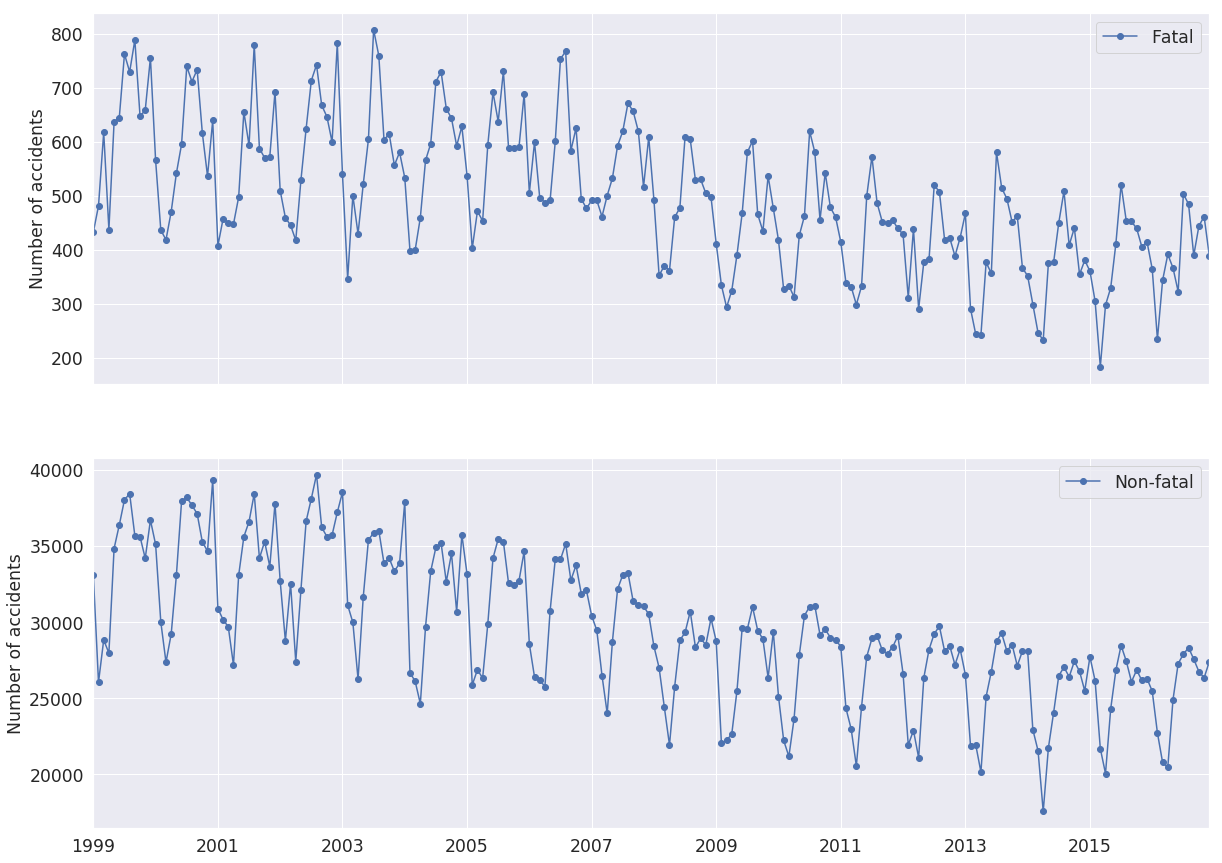

In [97]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(20, 15), sharex=True)
acc_data_count['Fatal'].plot(ax =ax1,  label='Fatal', marker='o')
acc_data_count['Non_fatal'].plot(ax = ax2, label='Non-fatal', marker='o')
#ax.xaxis.set_major_locator(mdates.YearLocator())
for ax in (ax1, ax2):
    ax.legend()
    ax.set_ylabel('Number of accidents')

### Seasonality

Next, let’s further explore the seasonality of our data with box plots, using seaborn’s boxplot() function to group the data by different time periods and display the distributions for each group. We’ll first group the data by month, to visualize monthly seasonality.

In [119]:
acc_data_count['Year'] = acc_data_count.index.year
acc_data_count['Month'] = acc_data_count.index.month

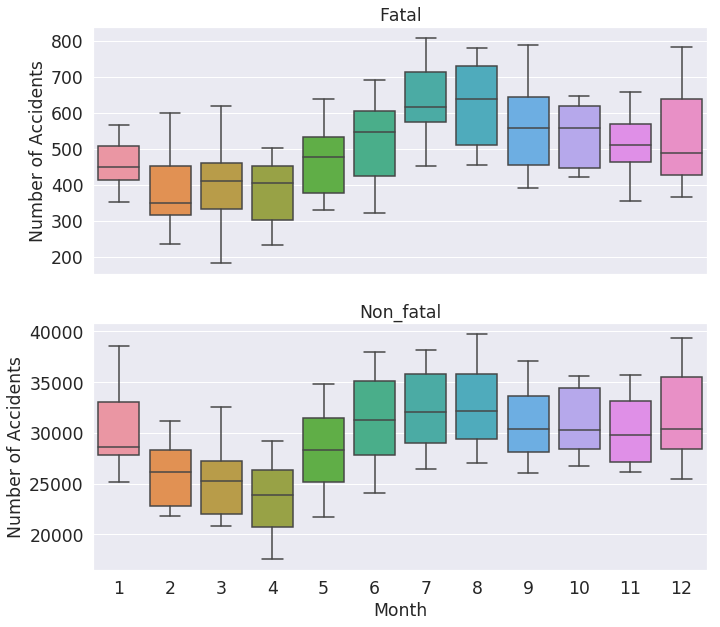

In [122]:
fig, axes = plt.subplots(2, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Fatal', 'Non_fatal'], axes):
    sns.boxplot(data=acc_data_count, x='Month', y=name, ax=ax)
    ax.set(ylabel='Number of Accidents', title=name)
# Remove the automatic x-axis label from all but the bottom subplot
    if ax != axes[-1]:
           ax.set_xlabel('')